In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from math import sqrt
import seaborn as sns
%matplotlib inline

In [231]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
print(trainX.shape, trainy.shape)
print(testX.shape, trainy.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (60000,)


In [232]:
# Conversion to float
trainX = trainX.astype(np.float32) 
testX = testX.astype(np.float32)
# Reshaping input data
trainX = trainX.reshape(len(trainX),-1)
testX = testX.reshape(len(testX),-1)
print(trainX.shape, trainy.shape)
print(testX.shape, trainy.shape)

(60000, 784) (60000,)
(10000, 784) (60000,)


In [175]:
class K_Means:
    def __init__(self, k = 2, tol = 0.001, max_iter = 300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data, init = None):

        self.centroids = {}
        
        # centroid initialisation
        if init == 'forgy':
            for i in range(self.k):
                self.centroids[i] = random.choice(data)
        elif init == None:
            for i in range(self.k):
                self.centroids[i] = data[i]
        else: # random partition
            indices = np.random.choice(range(0, self.k), replace = True, size = data.shape[0])
            mean = []
            for count in range(self.k):
                self.centroids[count] = data[indices == count].mean(axis=0)


        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
#                     print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break
        return self.classifications, self.centroids
    
    def elbow(self):
        D = []
        for k in range(self.k):
            points = self.classifications[k]
            points = np.array(points)
#             print(points)
            center = self.centroids[k]
#             print(self.centroids)
#             print(center)
#             dists=np.sum(np.square(points[:,np.newaxis]-Center).sum(axis=2))
#             print(dists)
            dists = []
            for p in points:
                dists.append(sum((e1-e2)**2 for e1, e2 in zip(p,center)))
            dists = np.sum(np.array(dists))
#             print(dists)
            D.append(dists)
        value = np.sum(np.array(D))
        return value

    def predict(self,data):

        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        final_cluster_label = distances.index(min(distances))
        return final_cluster_label


In [189]:
model2 = K_Means(k = 10)
classification, centroid = model2.fit(trainX)
# print(classification)
# print(centroid)
pred = []
for tx in testX:
    pred.append(model2.predict(tx))
pred = np.array(pred)

In [190]:
from sklearn.metrics.cluster import homogeneity_score
print("homogeneity score:")
homogeneity_score(pred, testy)

0.8056404908414813

In [184]:
K=range(2,12)
wss = []
for k in K:
    kmeans = K_Means(k = k)
    classification, centroid = kmeans.fit(tdata,init = 'forgy')
#     print(centroid)
    wss_iter = kmeans.elbow()
    wss.append(wss_iter)
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,2,1.651263e+08
1,3,1.316752e+08
2,4,1.225566e+08
3,5,1.187869e+08
4,6,1.159179e+08
5,7,1.019911e+08
6,8,1.012984e+08
7,9,8.467792e+07
8,10,8.522886e+07
9,11,8.401105e+07


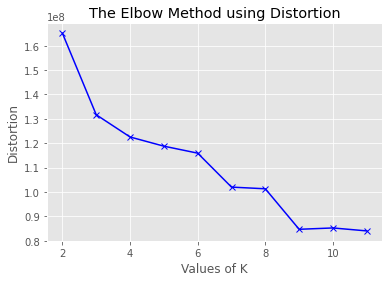

In [185]:
plt.plot(K, wss, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


## optimal number of clusters 
from the bove elbow graph optimal number of clusters can be 9.

### k means using sklearn

In [187]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(tdata)
pred_sk = kmeans.predict(tt)

In [197]:
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score(pred_sk, xx)

0.7883367065555108

## MNIST dataset 

In [213]:
mnist = pd.read_csv("data.csv")

In [214]:
mnist.head()

,[1.0866963863372803,2.3719661235809326,5.534520626068115,3.7711739540100098,1.877306580543518,3.5990941524505615,5.784208297729492,3.871398448944092,2.878445863723755,4.1095147132873535,...,0.0.26,0.0.27,0.0.28,0.0.29,0.0.30,0.0.31,0.0.32,0.0.33,0.0],Ankle Boot
0,[5.086210250854492,3.526383,3.173435,3.100720,4.561333,4.389340,3.113444,2.403284,4.039598,5.388708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],T-Shirt
1,[1.211804747581482,2.946491,2.014766,0.606742,1.302111,2.517385,1.538354,0.719057,1.375769,2.441072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],T-Shirt
2,[3.1817357540130615,3.386448,1.852063,1.134460,2.596234,3.389648,1.662953,1.038565,2.676021,3.362122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],Dress
3,[3.5364575386047363,5.801409,3.549685,1.483723,3.400284,6.017810,3.560772,0.938271,3.958203,6.236764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],T-Shirt
4,[4.996546268463135,2.998642,2.717624,2.631233,5.073828,3.387869,2.864835,2.815916,5.151153,3.737313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],Pullover


In [ ]:
X = mnist.iloc[:, :-1].values
y = mnist.iloc[:, -1].values
print(type(X),type(y))
X.shape,y.shape
# X.shape

In [237]:
#splitting into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 50)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)
x_train = X_train.values
print(type(X_train), type(y_train))
print(type(X_test),type(y_test))

(41999, 192) (41999,)
(18000, 192) (18000,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [229]:
model3 = K_Means(k = 10)
classification, centroid = model3.fit(X_train)
# print(classification)
# print(centroid)
pred3 = []
for x in X_test:
    pred.append(model3.predict(x))
pred3 = np.array(pred)

KeyError: 0